In [21]:
import numpy as np
import pandas as pd
import requests
from rates_processing import calc_discount
from cds_processing import *
from cds_data_fetch import get_cds_data

In [3]:
start_date = '2001-01-02'
end_date = '2024-01-31'
loss_given_default =0.6

quarterly_discount = calc_discount(start_date, end_date)
cds_data = get_cds_data()


/Users/Nidhi/Documents/GitHub/P15_DANK/src/interest_rates.py:65: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  processed_df.index = pd.to_datetime(processed_df.index)


WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [23]:
def process_cds_data(cds_data_dict):

    #cds_data_dict = get_cds_data()

    cds_data = pd.concat(cds_data_dict.values(), axis=0)

    df = cds_data.groupby(['date','ticker']).mean().reset_index()
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Apply the function to each group
    end_of_month_data = df.groupby('ticker').apply(resample_end_of_month)

    # Reset the index if needed
    end_of_month_data.reset_index(level=0, drop=True, inplace=True)

    # Ensure the 'date' column is the right datetime type
    end_of_month_data.reset_index(inplace=True)
    end_of_month_data['date'] = pd.to_datetime(end_of_month_data['date'])

    # Sort values by 'date' and 'parspread' to ensure proper quantile ranking
    end_of_month_data_sorted = end_of_month_data.sort_values(['date', 'parspread'])

    # Group by 'date' and apply the function to assign quantiles
    end_of_month_data_quantiled = end_of_month_data_sorted.groupby('date').apply(assign_quantiles)
    end_of_month_data_quantiled.rename(columns={'date': 'Date'}, inplace=True)


    end_of_month_data_quantiled.reset_index(inplace=True)
    #end_of_month_data_quantiled.drop(columns=['level_1','index','date'], inplace=True)
    return end_of_month_data_quantiled

cds_data = process_cds_data(cds_data)

In [24]:
cds_spread_mean = calc_cds_monthly(cds_data,'mean')
cds_spread_median= calc_cds_monthly(cds_data, 'median')
cds_spread_wt= calc_cds_monthly(cds_data, 'weighted')


In [25]:
cds_spread_mean

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,0.002491,0.003348,0.003995,0.004357,0.005210,0.005587,0.006080,0.006660,0.007288,0.008138,0.008992,0.010081,0.011149,0.012523,0.014149,0.016156,0.018753,0.024871,0.032910,0.090619
2001-02-28,0.002410,0.003161,0.003972,0.004377,0.005157,0.005723,0.006140,0.006844,0.007717,0.008626,0.009639,0.010597,0.011713,0.014385,0.015735,0.017167,0.018973,0.025032,0.037200,0.109326
2001-03-31,0.002398,0.003182,0.003787,0.004163,0.004767,0.005442,0.006147,0.006987,0.007757,0.008318,0.009071,0.009920,0.010994,0.012305,0.014668,0.016860,0.018614,0.022672,0.030782,0.085254
2001-04-30,0.002399,0.003182,0.003746,0.004140,0.004618,0.005151,0.005879,0.007086,0.007702,0.008242,0.008989,0.009667,0.010624,0.013174,0.014819,0.017324,0.021215,0.025962,0.033924,0.083825
2001-05-31,0.002294,0.003015,0.003496,0.003929,0.004420,0.004931,0.005743,0.006506,0.007162,0.007699,0.008305,0.009294,0.010668,0.012207,0.014059,0.016961,0.019887,0.024983,0.031858,0.067035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.001804,0.002825,0.003711,0.004269,0.004786,0.005366,0.006141,0.006797,0.007502,0.008218,0.009026,0.009986,0.011628,0.013892,0.016638,0.019790,0.024474,0.031316,0.044780,0.187233
2023-09-30,0.001861,0.003030,0.003881,0.004533,0.005111,0.005767,0.006436,0.007244,0.007975,0.008795,0.009710,0.010607,0.012010,0.014912,0.017779,0.021151,0.026091,0.033893,0.047905,0.202398
2023-10-31,0.001855,0.003160,0.004044,0.004677,0.005338,0.005985,0.006627,0.007411,0.008270,0.009169,0.010132,0.011029,0.012370,0.015233,0.018354,0.021548,0.026678,0.035229,0.049937,0.250154


In [26]:
cds_spread_median

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,0.002650,0.003450,0.004024,0.004411,0.005184,0.005576,0.006131,0.006624,0.007332,0.008250,0.009014,0.010078,0.011173,0.012444,0.014154,0.016029,0.018119,0.024266,0.032245,0.073000
2001-02-28,0.002496,0.003038,0.004025,0.004381,0.005200,0.005729,0.006130,0.006942,0.007715,0.008724,0.009486,0.010559,0.011375,0.014500,0.015495,0.017000,0.018395,0.025575,0.037375,0.080804
2001-03-31,0.002538,0.003216,0.003792,0.004077,0.004711,0.005462,0.006066,0.006949,0.007750,0.008212,0.009158,0.010000,0.011000,0.012600,0.014751,0.017111,0.018600,0.021813,0.029000,0.069616
2001-04-30,0.002542,0.003135,0.003705,0.004127,0.004615,0.005179,0.005976,0.007129,0.007693,0.008255,0.009000,0.009612,0.010469,0.013000,0.014731,0.017209,0.021229,0.025657,0.033250,0.074809
2001-05-31,0.002362,0.003000,0.003505,0.004000,0.004399,0.004833,0.005814,0.006500,0.007197,0.007673,0.008260,0.009250,0.010575,0.012181,0.014041,0.017100,0.019866,0.023979,0.031350,0.060257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.002046,0.002793,0.003705,0.004282,0.004746,0.005363,0.006141,0.006740,0.007497,0.008186,0.009015,0.009859,0.011583,0.013897,0.016886,0.019878,0.024370,0.030396,0.044734,0.094024
2023-09-30,0.002019,0.002989,0.003889,0.004581,0.005113,0.005729,0.006397,0.007246,0.007956,0.008748,0.009701,0.010596,0.011962,0.015004,0.017928,0.020963,0.026134,0.034214,0.046408,0.097432
2023-10-31,0.002016,0.003225,0.004060,0.004626,0.005310,0.006077,0.006573,0.007372,0.008340,0.009124,0.010180,0.011001,0.012228,0.015392,0.018551,0.021501,0.026382,0.035761,0.046596,0.100655


In [27]:
cds_spread_wt

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,0.002522,0.003378,0.003997,0.004366,0.005216,0.005589,0.006086,0.006665,0.007291,0.008143,0.009006,0.010090,0.011168,0.012564,0.014163,0.016172,0.018933,0.025010,0.033375,0.113971
2001-02-28,0.002445,0.003199,0.003981,0.004381,0.005172,0.005725,0.006141,0.006856,0.007725,0.008635,0.009653,0.010602,0.011778,0.014407,0.015756,0.017174,0.019037,0.025167,0.038187,0.173417
2001-03-31,0.002442,0.003197,0.003793,0.004171,0.004774,0.005445,0.006171,0.006989,0.007762,0.008323,0.009074,0.009939,0.011001,0.012331,0.014722,0.016877,0.018648,0.022848,0.031210,0.108990
2001-04-30,0.002460,0.003198,0.003750,0.004143,0.004622,0.005155,0.005887,0.007101,0.007707,0.008244,0.008996,0.009671,0.010649,0.013210,0.014833,0.017391,0.021300,0.026052,0.034350,0.108306
2001-05-31,0.002329,0.003026,0.003497,0.003939,0.004423,0.004940,0.005753,0.006514,0.007166,0.007701,0.008314,0.009301,0.010695,0.012223,0.014085,0.017064,0.019905,0.025319,0.031966,0.076811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.002041,0.002843,0.003721,0.004278,0.004792,0.005373,0.006151,0.006802,0.007506,0.008223,0.009033,0.009998,0.011655,0.013915,0.016698,0.019856,0.024545,0.031634,0.045493,0.878338
2023-09-30,0.002098,0.003051,0.003893,0.004539,0.005117,0.005772,0.006446,0.007249,0.007987,0.008803,0.009714,0.010615,0.012036,0.014965,0.017815,0.021238,0.026164,0.034355,0.048468,1.249470
2023-10-31,0.002092,0.003191,0.004057,0.004684,0.005342,0.005993,0.006635,0.007417,0.008279,0.009179,0.010138,0.011037,0.012392,0.015290,0.018382,0.021638,0.026773,0.035608,0.050747,1.782688


In [28]:
def calc_return(quarterly_discount, cds_spread):
    lambda_df = 4 * np.log(1+(cds_spread/(4*loss_given_default)))
    quarters = range(1, 21)  # 1 to 20 quarters

    risky_duration = pd.DataFrame(index=lambda_df.index, columns=lambda_df.columns)
    for col in lambda_df.columns:
        quarterly_survival_probability = pd.DataFrame(index=lambda_df.index, columns=quarters)
        for quarter in quarters:
            quarterly_survival_probability[quarter] = np.exp(-((quarter * lambda_df[col]) / 4))
        temp_df = quarterly_survival_probability * quarterly_discount
        risky_duration[col] = 0.25 * temp_df.sum(axis=1)
    risky_duration_shifted = risky_duration.shift(1)
    cds_spread_shifted = cds_spread.shift(1)
    cds_spread_change = cds_spread.diff()
    cds_return = ((cds_spread_shifted/12) + (cds_spread_change * risky_duration_shifted))
    return cds_return

In [30]:
return_mean = calc_return(quarterly_discount, cds_spread_mean)
return_median = calc_return(quarterly_discount, cds_spread_median)
return_wt = calc_return(quarterly_discount, cds_spread_wt)

In [31]:
return_mean*100

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,0.019918,0.025953,0.033057,0.036519,0.042865,0.047973,0.051288,0.057412,0.065189,0.072890,0.081650,0.089367,0.098756,0.123652,0.134328,0.145087,0.158550,0.208913,0.318168,0.940310
2001-03-31,0.019948,0.026568,0.031070,0.034122,0.038689,0.044606,0.051246,0.058597,0.064745,0.068504,0.074105,0.080902,0.089752,0.097171,0.119489,0.139711,0.154201,0.183002,0.240901,0.662733
2001-04-30,0.020004,0.026523,0.030997,0.034388,0.037719,0.041426,0.047622,0.059559,0.063903,0.068298,0.074490,0.079263,0.086644,0.114198,0.124251,0.146707,0.189862,0.232763,0.298159,0.692145
2001-05-31,0.018450,0.024077,0.027573,0.031423,0.035596,0.039717,0.047013,0.050614,0.056324,0.060788,0.064970,0.075139,0.089169,0.095770,0.112493,0.139119,0.157646,0.202272,0.253145,0.465762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.015032,0.023538,0.030924,0.035576,0.039881,0.044716,0.051174,0.056634,0.062513,0.068478,0.075208,0.083213,0.096907,0.115775,0.138652,0.164918,0.203952,0.260958,0.373124,1.538730
2023-09-30,0.015517,0.025274,0.032365,0.037806,0.042633,0.048104,0.053666,0.060418,0.066508,0.073352,0.080986,0.088450,0.100116,0.124341,0.148227,0.176323,0.217463,0.282420,0.398984,1.676356
2023-10-31,0.015456,0.026341,0.033705,0.038983,0.044489,0.049883,0.055233,0.061759,0.068926,0.076419,0.084437,0.091912,0.103081,0.126935,0.152938,0.179550,0.222276,0.293441,0.415817,2.046441


In [32]:
return_median*100

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,0.020477,0.024462,0.033541,0.036442,0.043367,0.048059,0.051077,0.058512,0.065085,0.073680,0.080023,0.088977,0.095203,0.125007,0.131829,0.143616,0.153842,0.215685,0.321246,0.686361
2001-03-31,0.021261,0.027275,0.030983,0.033171,0.037966,0.044810,0.050378,0.057929,0.064674,0.067093,0.075459,0.081874,0.090690,0.100092,0.121011,0.142871,0.155524,0.172334,0.221298,0.556013
2001-04-30,0.021203,0.025709,0.030420,0.034646,0.037958,0.041707,0.049336,0.060335,0.063816,0.069005,0.074192,0.078128,0.084536,0.110364,0.122662,0.143908,0.190122,0.233021,0.298063,0.647295
2001-05-31,0.018561,0.024154,0.027968,0.032541,0.035315,0.038121,0.047442,0.050253,0.056897,0.060329,0.064246,0.074838,0.088777,0.096466,0.112768,0.141831,0.157246,0.189682,0.249900,0.420535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.017052,0.023267,0.030875,0.035680,0.039541,0.044690,0.051169,0.056161,0.062474,0.068210,0.075115,0.082159,0.096531,0.115813,0.140719,0.165648,0.203091,0.253315,0.372697,0.782225
2023-09-30,0.016822,0.024930,0.032432,0.038210,0.042649,0.047786,0.053335,0.060442,0.066348,0.072961,0.080912,0.088368,0.099714,0.125119,0.149462,0.174738,0.217829,0.285103,0.386614,0.810937
2023-10-31,0.016799,0.026885,0.033840,0.038554,0.044256,0.050653,0.054777,0.061436,0.069511,0.076042,0.084837,0.091676,0.101900,0.128263,0.154572,0.179156,0.219836,0.297858,0.388267,0.837575


In [33]:
return_wt*100

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,0.020210,0.026284,0.033142,0.036535,0.043010,0.047991,0.051289,0.057530,0.065273,0.072974,0.081769,0.089393,0.099392,0.123794,0.134521,0.145125,0.158851,0.210031,0.327372,1.530340
2001-03-31,0.020344,0.026639,0.031104,0.034203,0.038732,0.044638,0.051502,0.058587,0.064783,0.068543,0.074098,0.081096,0.089657,0.097397,0.120025,0.139884,0.154411,0.184571,0.243154,0.804366
2001-04-30,0.020597,0.026655,0.031028,0.034387,0.037737,0.041464,0.047607,0.059752,0.063945,0.068296,0.074577,0.079225,0.086955,0.114548,0.124172,0.147508,0.190824,0.233080,0.301691,0.899616
2001-05-31,0.018589,0.024143,0.027564,0.031550,0.035615,0.039832,0.047109,0.050629,0.056360,0.060807,0.065055,0.075211,0.089407,0.095781,0.112782,0.140208,0.157386,0.206562,0.252160,0.472373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.017002,0.023689,0.031011,0.035644,0.039929,0.044768,0.051255,0.056680,0.062551,0.068525,0.075268,0.083319,0.097129,0.115970,0.139148,0.165462,0.204546,0.263603,0.379070,6.654625
2023-09-30,0.017491,0.025453,0.032462,0.037856,0.042677,0.048143,0.053747,0.060458,0.066606,0.073414,0.081017,0.088517,0.100330,0.124789,0.148522,0.177046,0.218073,0.286264,0.403679,9.414801
2023-10-31,0.017437,0.026594,0.033818,0.039039,0.044527,0.049952,0.055301,0.061810,0.069000,0.076500,0.084485,0.091981,0.103265,0.127416,0.153172,0.180299,0.223067,0.296607,0.422515,13.041054


In [34]:
actual_return = pd.read_csv('/Users/Nidhi/Downloads/He_Kelly_Manela_Factors_And_Test_Assets_monthly.csv')


In [35]:
actual_return = actual_return[['yyyymm','CDS_01','CDS_02','CDS_03','CDS_04','CDS_05','CDS_06','CDS_07','CDS_08','CDS_09','CDS_10','CDS_11','CDS_12','CDS_13','CDS_14','CDS_15','CDS_16','CDS_17','CDS_18','CDS_19','CDS_20']]

In [36]:
actual_return = actual_return.dropna(axis=0)
actual_return*100

,yyyymm,CDS_01,CDS_02,CDS_03,CDS_04,CDS_05,CDS_06,CDS_07,CDS_08,CDS_09,...,CDS_11,CDS_12,CDS_13,CDS_14,CDS_15,CDS_16,CDS_17,CDS_18,CDS_19,CDS_20
373,20010200.0,0.39,0.40,0.33,0.24,0.93,0.30,0.20,0.48,0.44,...,0.78,-0.36,0.42,0.57,0.27,-1.53,-0.32,0.70,0.05,1.93
374,20010300.0,0.12,0.41,0.61,0.45,0.73,0.59,0.79,0.71,0.87,...,0.60,0.42,0.32,0.68,-0.12,0.93,0.83,-0.12,0.72,2.19
375,20010400.0,0.33,0.44,0.44,0.60,0.54,0.37,0.44,0.44,0.68,...,0.98,1.06,0.84,0.98,0.83,1.24,0.61,1.09,0.41,-0.18
376,20010500.0,0.38,0.43,0.45,0.39,0.44,0.39,0.40,0.75,0.45,...,0.76,0.78,0.49,1.17,1.08,0.61,1.50,1.52,1.84,1.40
377,20010600.0,0.30,0.27,0.44,0.37,0.79,0.42,0.53,0.35,0.40,...,0.31,0.29,0.38,0.45,0.34,0.44,0.20,0.73,0.65,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,20120800.0,0.05,0.09,0.13,0.11,0.22,0.22,0.24,0.17,0.15,...,0.31,0.15,0.35,0.32,0.43,0.62,0.84,0.60,0.51,1.52
512,20120900.0,0.12,0.10,0.20,0.22,0.30,0.23,0.30,0.33,0.39,...,0.49,0.59,0.57,0.87,0.70,0.83,0.92,1.20,1.19,1.74
513,20121000.0,0.10,0.09,0.09,0.16,0.18,0.19,0.14,0.10,0.19,...,0.08,0.28,0.43,0.42,0.13,0.45,0.33,0.28,-0.10,0.45
514,20121100.0,-0.06,-0.07,-0.09,-0.07,-0.10,-0.10,-0.09,-0.16,-0.16,...,-0.37,-0.05,-0.12,0.05,0.15,-0.02,0.26,0.27,1.07,0.15


<Axes: xlabel='Date'>

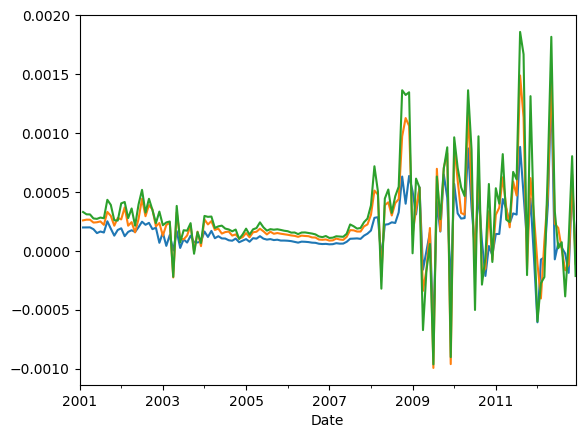

In [37]:
cds_return_paper = return_mean[return_mean.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: xlabel='Date'>

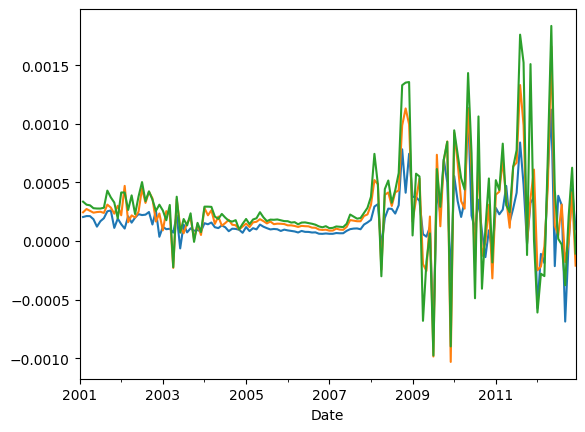

In [38]:
cds_return_paper = return_median[return_median.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: xlabel='Date'>

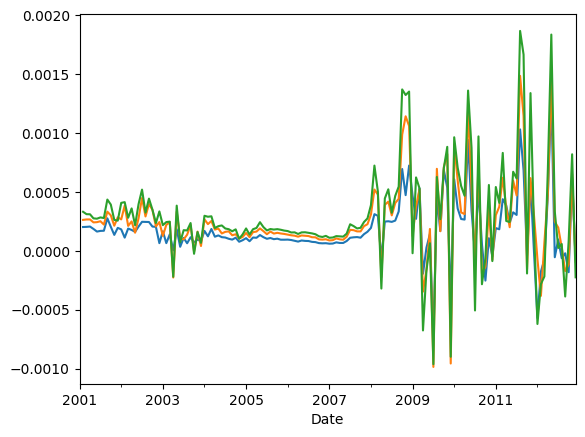

In [39]:
cds_return_paper = return_wt[return_wt.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: >

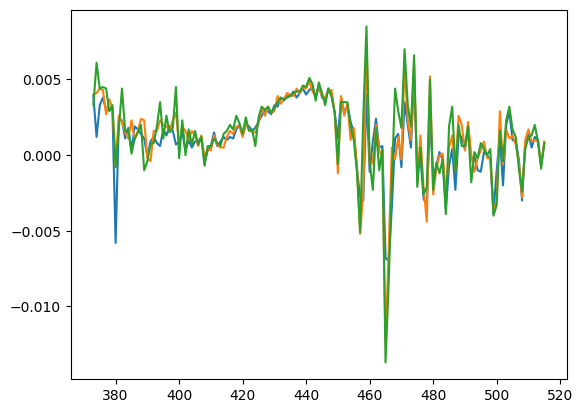

In [40]:
actual_return['CDS_01'].plot()
actual_return['CDS_02'].plot()
actual_return['CDS_03'].plot()